In [1]:
# Import essential libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import seaborn as sns  # For data visualization
import matplotlib.pyplot as plt  # For plotting graphs
import datetime as dt  # For handling date and time operations


In [2]:
# Load the traffic dataset from a CSV file
traffic_data = pd.read_csv('/content/traffic.csv')

# Display the first few rows of the dataset
traffic_data.head()


,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [3]:
# Convert the 'DateTime' column to datetime format with UTC timezone
traffic_data['DateTime'] = pd.to_datetime(traffic_data['DateTime'], utc=True)

# Extract and create new columns for various date and time components
traffic_data['Year'] = traffic_data['DateTime'].dt.year
traffic_data['Month'] = traffic_data['DateTime'].dt.month
traffic_data['Day_of_Month'] = traffic_data['DateTime'].dt.day
traffic_data['Day_of_Week'] = traffic_data['DateTime'].dt.dayofweek
traffic_data['Date'] = traffic_data['DateTime'].dt.date
traffic_data['Hour'] = traffic_data['DateTime'].dt.hour
traffic_data['Day_of_Year'] = traffic_data['DateTime'].dt.dayofyear
traffic_data['Seconds'] = pd.to_timedelta(traffic_data['DateTime'].dt.strftime('%H:%M:%S')).dt.total_seconds().astype(int)


In [4]:
traffic_data.head()

,DateTime,Junction,Vehicles,ID,Year,Month,Day_of_Month,Day_of_Week,Date,Hour,Day_of_Year,Seconds
0,2015-11-01 00:00:00+00:00,1,15,20151101001,2015,11,1,6,2015-11-01,0,305,0
1,2015-11-01 01:00:00+00:00,1,13,20151101011,2015,11,1,6,2015-11-01,1,305,3600
2,2015-11-01 02:00:00+00:00,1,10,20151101021,2015,11,1,6,2015-11-01,2,305,7200
3,2015-11-01 03:00:00+00:00,1,7,20151101031,2015,11,1,6,2015-11-01,3,305,10800
4,2015-11-01 04:00:00+00:00,1,9,20151101041,2015,11,1,6,2015-11-01,4,305,14400


In [5]:
traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   DateTime      48120 non-null  datetime64[ns, UTC]
 1   Junction      48120 non-null  int64              
 2   Vehicles      48120 non-null  int64              
 3   ID            48120 non-null  int64              
 4   Year          48120 non-null  int32              
 5   Month         48120 non-null  int32              
 6   Day_of_Month  48120 non-null  int32              
 7   Day_of_Week   48120 non-null  int32              
 8   Date          48120 non-null  object             
 9   Hour          48120 non-null  int32              
 10  Day_of_Year   48120 non-null  int32              
 11  Seconds       48120 non-null  int64              
dtypes: datetime64[ns, UTC](1), int32(6), int64(4), object(1)
memory usage: 3.3+ MB


In [7]:
# Check for missing values in each column of the traffic dataset
missing_values = traffic_data.isnull().sum()

# Display the count of missing values
missing_values


DateTime        0
Junction        0
Vehicles        0
ID              0
Year            0
Month           0
Day_of_Month    0
Day_of_Week     0
Date            0
Hour            0
Day_of_Year     0
Seconds         0
dtype: int64

In [8]:
# Generate and display descriptive statistics for the traffic dataset
traffic_data_description = traffic_data.describe()

# Display the descriptive statistics
traffic_data_description


,Junction,Vehicles,ID,Year,Month,Day_of_Month,Day_of_Week,Hour,Day_of_Year,Seconds
count,48120.000000,48120.000000,4.812000e+04,48120.000000,48120.000000,48120.000000,48120.000000,48120.000000,48120.000000,48120.000000
mean,2.180549,22.791334,2.016330e+10,2016.269825,5.884289,15.700748,2.996010,11.500000,163.926185,41400.000000
std,0.966955,20.750063,5.944854e+06,0.616093,3.569872,8.784073,2.000017,6.922258,109.219475,24920.130527
min,1.000000,1.000000,2.015110e+10,2015.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,9.000000,2.016042e+10,2016.000000,3.000000,8.000000,1.000000,5.750000,72.000000,20700.000000
50%,2.000000,15.000000,2.016093e+10,2016.000000,5.000000,16.000000,3.000000,11.500000,144.000000,41400.000000
75%,3.000000,29.000000,2.017023e+10,2017.000000,9.000000,23.000000,5.000000,17.250000,260.000000,62100.000000
max,4.000000,180.000000,2.017063e+10,2017.000000,12.000000,31.000000,6.000000,23.000000,366.000000,82800.000000


In [9]:
# Calculate the number of unique values in each column of the traffic dataset
unique_values_count = traffic_data.nunique()

# Display the count of unique values
unique_values_count


DateTime        14592
Junction            4
Vehicles          141
ID              48120
Year                3
Month              12
Day_of_Month       31
Day_of_Week         7
Date              608
Hour               24
Day_of_Year       366
Seconds            24
dtype: int64

In [12]:
# Select only numeric columns for correlation calculation
numeric_cols = traffic_data.select_dtypes(include=[np.number])

# Calculate the absolute correlation matrix and flatten it into a DataFrame
correlation_matrix = numeric_cols.corr().abs().unstack().sort_values(kind="quicksort", ascending=True).reset_index()

# Filter the DataFrame to include only rows where 'level_0' is 'Vehicles' and 'level_0' is not equal to 'level_1'
filtered_correlations = correlation_matrix.loc[
    (correlation_matrix['level_0'] == 'Vehicles') & (correlation_matrix['level_0'] != correlation_matrix['level_1'])
]

# Rename the columns for clarity
filtered_correlations.columns = ['Target Feature', 'Input Features', 'Correlation']

# Reset the index of the DataFrame and drop the old index column
filtered_correlations.reset_index(drop=True, inplace=True)

# Display the processed correlation DataFrame
filtered_correlations


,Target Feature,Input Features,Correlation
0,Vehicles,Day_of_Year,0.020746
1,Vehicles,Month,0.022723
2,Vehicles,Day_of_Month,0.027895
3,Vehicles,Day_of_Week,0.126027
4,Vehicles,Seconds,0.219938
5,Vehicles,Hour,0.219938
6,Vehicles,Year,0.221253
7,Vehicles,ID,0.227974
8,Vehicles,Junction,0.613787


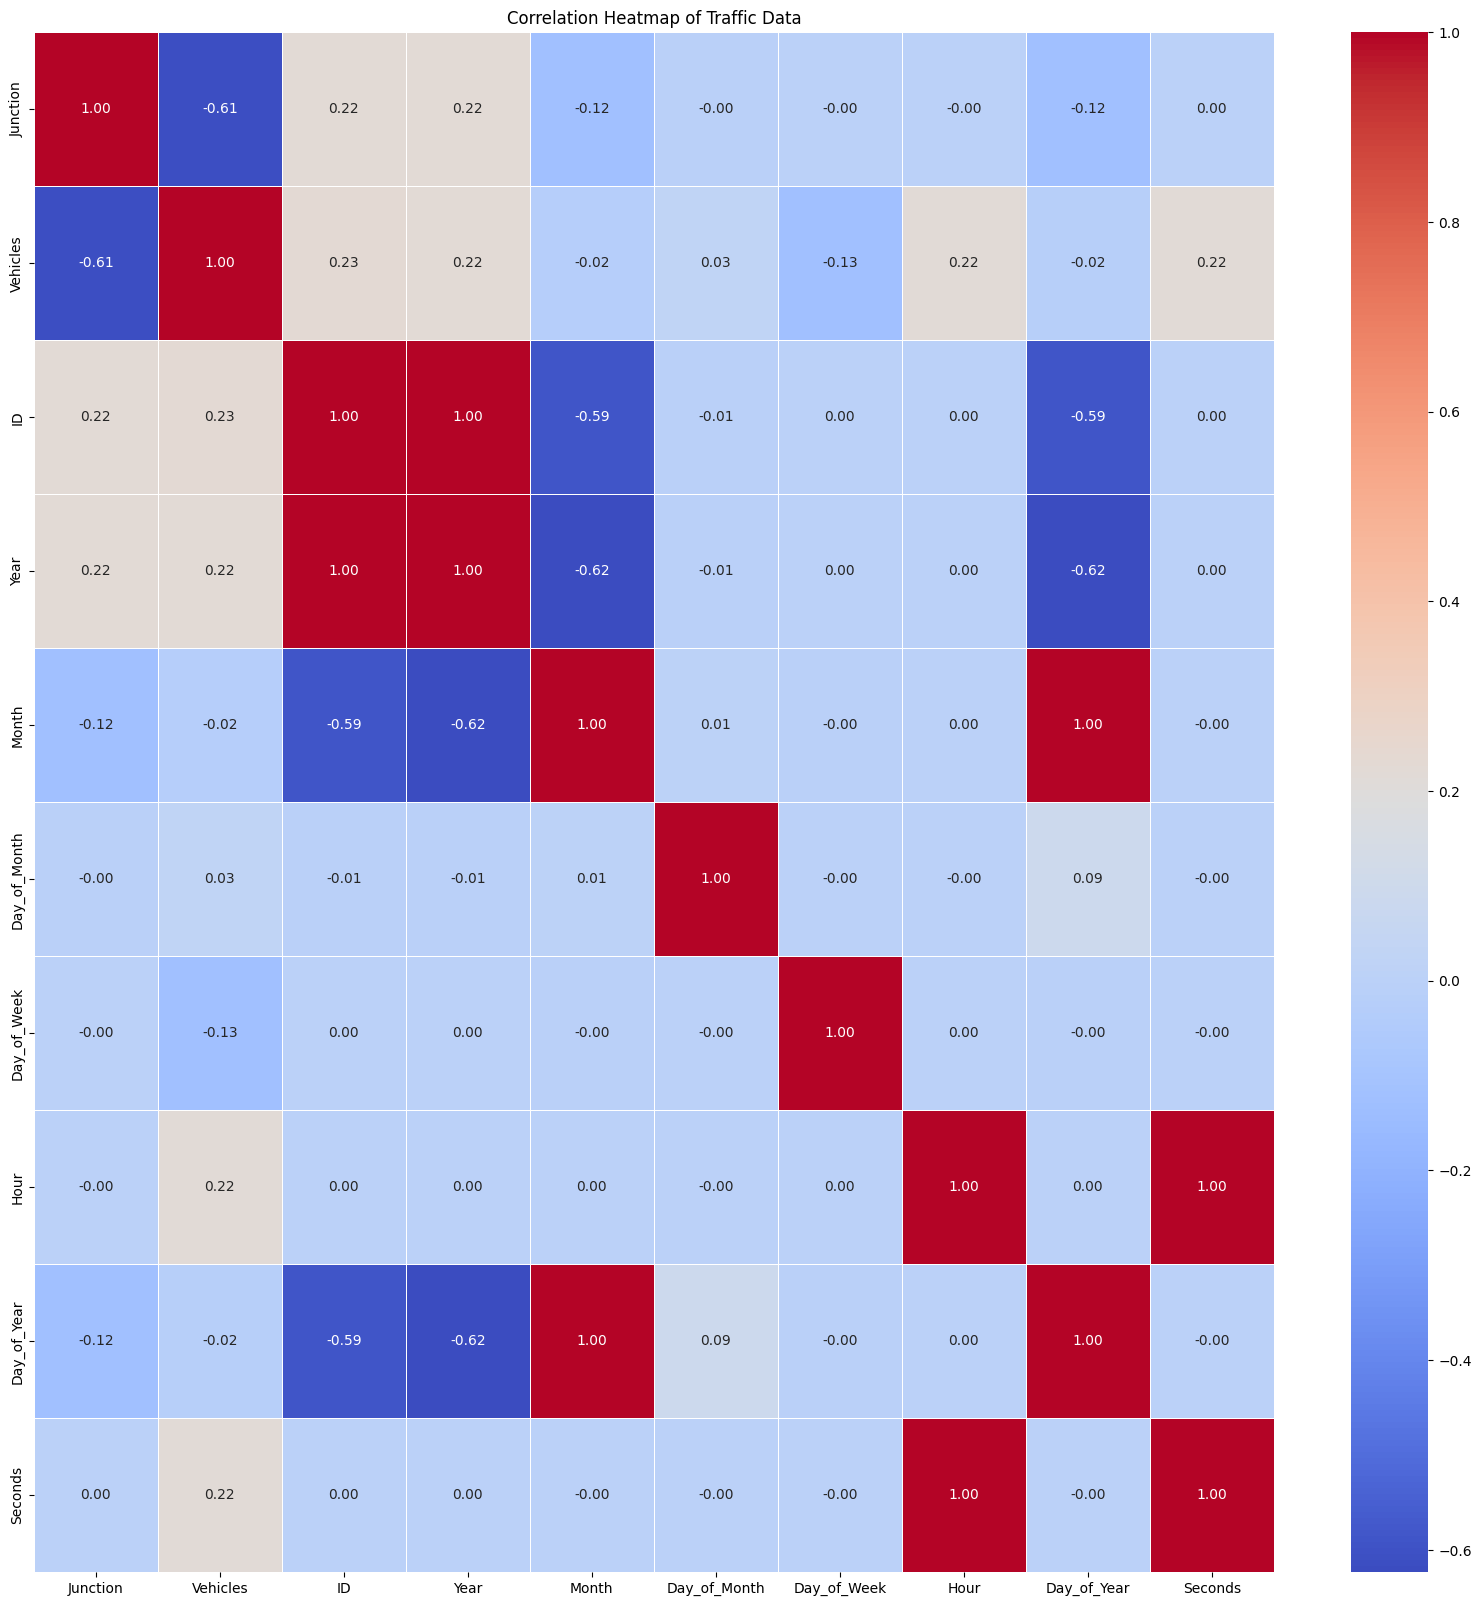

In [14]:
# Select only numeric columns for the correlation matrix
numeric_traffic_data = traffic_data.select_dtypes(include=[np.number])

# Generate a heatmap to visualize the correlation matrix of the numeric columns in the traffic dataset
plt.figure(figsize=(20, 20))
sns.heatmap(numeric_traffic_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Traffic Data')
plt.show()


In [15]:
# Group the data by 'Junction' and sum the 'Vehicles' for each junction
junction_vehicle_summary = traffic_data.groupby("Junction")["Vehicles"].sum().reset_index(name="Total_Vehicles")

# Display the summarized DataFrame
junction_vehicle_summary


,Junction,Total_Vehicles
0,1,657412
1,2,207983
2,3,199823
3,4,31501


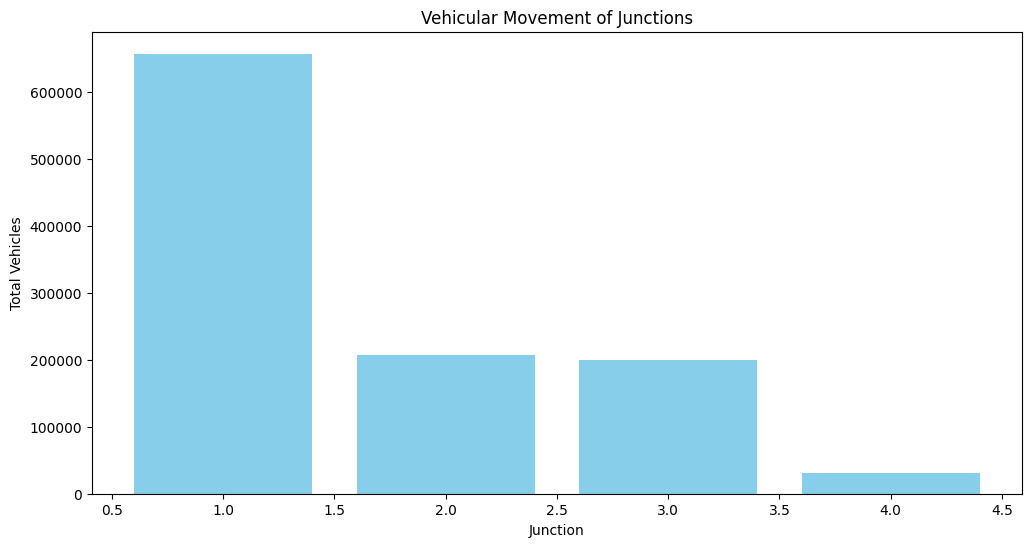

In [16]:
# Plot a bar chart to visualize vehicular movement at different junctions
plt.figure(figsize=(12, 6))
plt.bar(junction_vehicle_summary["Junction"], junction_vehicle_summary["Total_Vehicles"], color='skyblue')
plt.title("Vehicular Movement of Junctions")
plt.xlabel("Junction")
plt.ylabel("Total Vehicles")
plt.show()


In [17]:
# Create a pivot table to summarize vehicular movement by date and junction
date_junction_pivot = traffic_data.pivot_table(index='Date', columns='Junction', values='Vehicles', aggfunc='sum')

# Display the first few rows of the pivot table
date_junction_pivot.head()


Junction,1,2,3,4
Date,,,,
2015-11-01,327.0,133.0,136.0,NaN
2015-11-02,546.0,197.0,166.0,NaN
2015-11-03,544.0,217.0,150.0,NaN
2015-11-04,498.0,199.0,121.0,NaN
2015-11-05,464.0,200.0,106.0,NaN


<Figure size 1200x600 with 0 Axes>

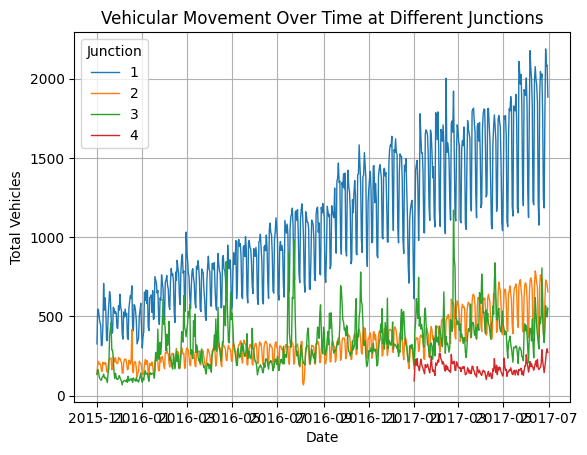

In [18]:
# Plot the pivot table to visualize vehicular movement over time at different junctions
plt.figure(figsize=(12, 6))
date_junction_pivot.plot(kind='line', linewidth=1.0)
plt.title("Vehicular Movement Over Time at Different Junctions")
plt.xlabel("Date")
plt.ylabel("Total Vehicles")
plt.legend(title="Junction")
plt.grid(True)
plt.show()


In [19]:
# Create a pivot table to summarize vehicular movement by month and junction
month_junction_pivot = traffic_data.pivot_table(index='Month', columns='Junction', values='Vehicles', aggfunc='sum')

# Display the pivot table
month_junction_pivot


Junction,1,2,3,4
Month,,,,
1,61379.0,16618.0,19165.0,5578.0
2,62929.0,19881.0,21294.0,5564.0
3,69326.0,23931.0,21978.0,4931.0
4,67486.0,24247.0,27063.0,4454.0
5,77227.0,27326.0,18861.0,4877.0
6,79314.0,27064.0,18727.0,6097.0
7,29111.0,8582.0,11049.0,NaN
8,31185.0,8237.0,9540.0,NaN
9,34374.0,9065.0,11954.0,NaN


<Figure size 1200x600 with 0 Axes>

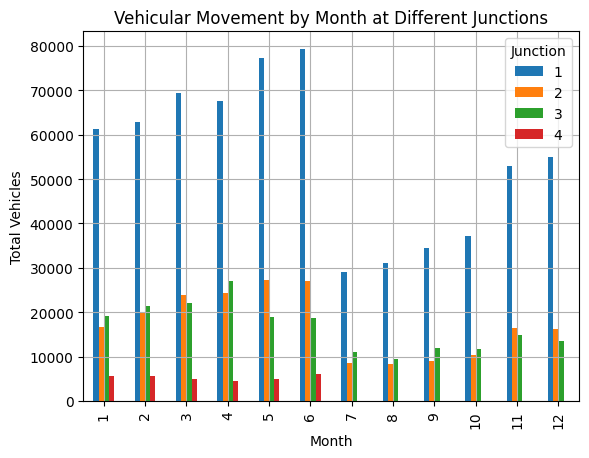

In [20]:
# Plot the pivot table to visualize vehicular movement by month at different junctions
plt.figure(figsize=(12, 6))
month_junction_pivot.plot(kind='bar', linewidth=1.0)
plt.title("Vehicular Movement by Month at Different Junctions")
plt.xlabel("Month")
plt.ylabel("Total Vehicles")
plt.legend(title="Junction")
plt.grid(True)
plt.show()


In [21]:
# Create a pivot table to summarize vehicular movement by year and junction
year_junction_pivot = traffic_data.pivot_table(index='Year', columns='Junction', values='Vehicles', aggfunc='sum')

# Display the pivot table
year_junction_pivot


Junction,1,2,3,4
Year,,,,
2015,30223.0,12226.0,8103.0,NaN
2016,345098.0,103050.0,115440.0,NaN
2017,282091.0,92707.0,76280.0,31501.0


<Figure size 1200x600 with 0 Axes>

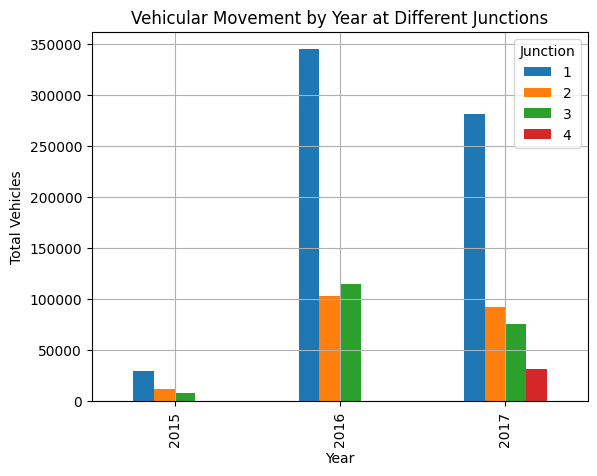

In [22]:
# Plot the pivot table to visualize vehicular movement by year at different junctions
plt.figure(figsize=(12, 6))
year_junction_pivot.plot(kind='bar', linewidth=1.0)
plt.title("Vehicular Movement by Year at Different Junctions")
plt.xlabel("Year")
plt.ylabel("Total Vehicles")
plt.legend(title="Junction")
plt.grid(True)
plt.show()


In [24]:
from statistics import mean

# Create a pivot table to summarize average vehicular movement by day of the month and junction
day_junction_pivot = traffic_data.pivot_table(index='Day_of_Month', columns='Junction', values='Vehicles', aggfunc=mean)

# Display the pivot table
day_junction_pivot


Junction,1,2,3,4
Day_of_Month,,,,
1,42.781250,13.889583,13.487500,6.944444
2,44.864583,14.085417,14.066667,8.118056
3,44.150000,13.947917,13.181250,7.881944
4,42.391667,12.916667,12.666667,7.701389
5,42.847917,13.054167,12.893750,7.951389
6,44.983333,13.902083,12.154167,7.500000
7,43.822917,14.312500,12.077083,7.277778
8,45.197917,14.587500,11.458333,6.826389
9,46.154167,14.343750,13.185417,7.381944


<Figure size 1200x600 with 0 Axes>

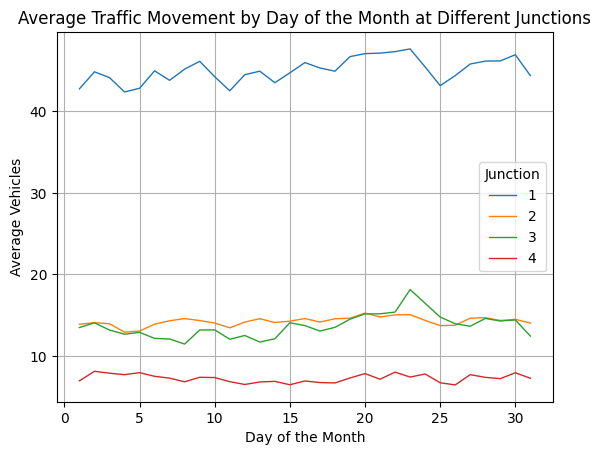

In [25]:
# Plot the pivot table to visualize average vehicular movement by day of the month at different junctions
plt.figure(figsize=(12, 6))
day_junction_pivot.plot(kind='line', linewidth=1.0)
plt.title("Average Traffic Movement by Day of the Month at Different Junctions")
plt.xlabel("Day of the Month")
plt.ylabel("Average Vehicles")
plt.legend(title="Junction")
plt.grid(True)
plt.show()


In [28]:
# Create a pivot table to summarize average vehicular movement by day of the week and junction
day_of_week_junction_pivot = traffic_data.pivot_table(index='Day_of_Week', columns='Junction', values='Vehicles', aggfunc=mean)

# Display the pivot table
day_of_week_junction_pivot


Junction,1,2,3,4
Day_of_Week,,,,
0,49.404215,15.228927,13.657567,7.469551
1,51.240900,16.556992,13.251916,7.921474
2,50.862548,16.416667,13.406130,7.628205
3,50.284483,16.026341,14.299330,7.915064
4,47.042146,14.942529,14.351054,7.307692
5,34.111919,10.412791,14.596899,6.546667
6,32.298372,10.144157,12.305556,5.945513


<Figure size 1200x600 with 0 Axes>

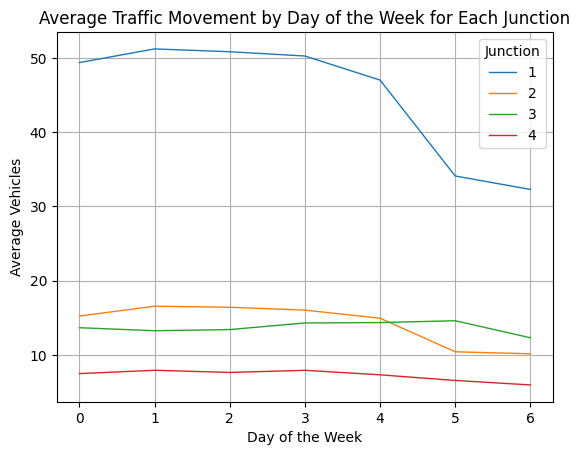

In [29]:
# Plot the pivot table to visualize average vehicular movement by day of the week at different junctions
plt.figure(figsize=(12, 6))
day_of_week_junction_pivot.plot(kind='line', linewidth=1.0)
plt.title("Average Traffic Movement by Day of the Week for Each Junction")
plt.xlabel("Day of the Week")
plt.ylabel("Average Vehicles")
plt.legend(title="Junction")
plt.grid(True)
plt.show()


In [34]:

traffic_data['Time']= traffic_data['DateTime'].dt.hour
# Create a pivot table to summarize average vehicular movement by hour of the day and junction
time_junction_pivot = traffic_data.pivot_table(index='Time', columns='Junction', values='Vehicles', aggfunc=mean)

# Display the pivot table
time_junction_pivot


Junction,1,2,3,4
Time,,,,
0,45.738487,15.656250,14.174342,6.922652
1,39.156250,14.115132,9.856908,5.668508
2,33.907895,12.995066,8.055921,4.839779
3,29.430921,11.468750,6.776316,4.320442
4,25.654605,10.000000,5.978618,3.856354
5,24.067434,9.217105,5.685855,3.944751
6,26.080592,9.263158,6.236842,4.110497
7,29.526316,10.064145,7.550987,4.519337
8,32.735197,10.745066,9.057566,5.220994


<Figure size 1200x600 with 0 Axes>

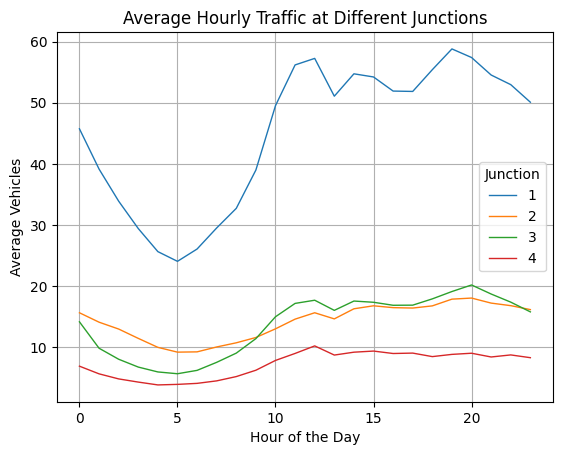

In [35]:
# Plot the pivot table to visualize average vehicular movement by hour of the day at different junctions
plt.figure(figsize=(12, 6))
time_junction_pivot.plot(kind='line', linewidth=1.0)
plt.title("Average Hourly Traffic at Different Junctions")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Vehicles")
plt.legend(title="Junction")
plt.grid(True)
plt.show()


All four junctions have shown a consistent yearly increase in vehicular traffic, with Junction 1 experiencing the most significant rise.

A notable increase in traffic was observed at Junctions 1 and 3 around June, likely due to summer-related activities during that period.

Vehicular movement increased daily across all junctions except for Junction 4, which began recording data in January 2017.

Except for Junction 4, traffic typically rises in the morning around 6 AM, remains stable throughout the afternoon, and decreases in the evening around 8 PM.

There is a clear decrease in traffic during weekends compared to the steady levels observed on weekdays.

Junction 4 was introduced to alleviate overall traffic congestion along the axis, effectively improving the traffic situation.

This version maintains the original meaning while providing a clear and distinct structure. Please provide the next text or code for paraphrasing.











In [36]:
traffic_data.to_csv('traffic_cleaned_data.csv')